## Calculation Exercise 1: Multilayer Perceptron (MLP)
1. Consider the MLP network in Figure 1. Table 1 shows the value of each of the parameters of the
network. The activation functions for all neurons are shown in Table 2. The neurons in the input layer,
i.e. neuron 1 and neuron 2, do not use any activation function and simply pass in the input to the
network. All the neurons in the hidden layer use a ReLU activation function, i.e., a3 (x) = a4(x) =
a5 (x) = ReLU(x) = max(0, x). The
 neuron in the output layer uses a Sigmoid activation function, i.e.,
a6 (x) = σ(x) = 1/ (1 + exp(−x)). For cross entropy loss, ensure you use loge . Answer the following
questions.


In [39]:
import numpy as np

w13 = 0.4
w14 = -0.2
w15 = -0.3
w23 = 0.0
w24 = 0.7
w25 = 0.1
w36 = -0.2
w46 = 0.5
w56 = -0.6

a1 = 1  
a2 = 2

def relu(x):
    return np.maximum(x, 0)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def bce_loss(y_true, y_pred):
    return -y_true * np.log(y_pred) - (1 - y_true) * np.log(1 - y_pred)
a3 = relu(w13 * a1 + w23 * a2)
# Calculate the output of neuron 4
a4 = relu(w14 * a1 + w24 * a2)
# Calculate the output of neuron 5
a5 = relu(w15 * a1 + w25 * a2)
# Calculate the output of neuron 6
a6 = sigmoid(w36 * a3 + w46 * a4 + w56 * a5)
# Q1.1

def mlp_output(x1, x2):
    # Define the weights
    w13 = 0.4
    w14 = -0.2
    w15 = -0.3
    w23 = 0.0
    w24 = 0.7
    w25 = 0.1
    w36 = -0.2
    w46 = 0.5
    w56 = -0.6
    
    a1 = x[0]
    a2 = x[1]

    a3 = relu(w13 * a1 + w23 * a2)
    # Calculate the output of neuron 4
    a4 = relu(w14 * a1 + w24 * a2)
    # Calculate the output of neuron 5
    a5 = relu(w15 * a1 + w25 * a2)
    # Calculate the output of neuron 6
    a6 = sigmoid(w36 * a3 + w46 * a4 + w56 * a5)
    return a6


x = [1,2]
output = mlp_output(x[0], x[1])
print("y_hat:",output)

#Q1.2
y_true = 0
y_pred = output
loss = bce_loss(y_true, y_pred)

print("BCE Loss, y = 0:", loss)

#Q1.3
y_true2 = 1
loss = bce_loss(y_true2, y_pred)

print("BCE Loss, y = 1:", loss)

'''
The predicted output of 0.6271 is closer to 1 than to 0. The BCE loss penalizes more when the prediction is far from the true label. Since the prediction was closer to 1, the loss for ( y = 1 ) is smaller.
When ( y = 0 ), the prediction of 0.6271 is significantly off, leading to a higher loss.
'''

#Q1.4
error_gradient = -y_true / y_pred + (1 - y_true) / (1 - y_pred)
error_gradient_w36 = error_gradient * a3

lr = 0.1
w36_updated = w36 - lr * error_gradient_w36
print("Updated value of w3,6 (original = -0.2):", w36_updated)

#Q1.5
error_gradient = -y_true / y_pred + (1 - y_true) / (1 - y_pred)
error_gradient_w25 = error_gradient * w56 * (a5 > 0) * x[1]

# Update the value of w2,5 using the error gradient and the learning rate
w25_updated = w25 - lr * error_gradient_w25

print("Updated value of w2,5 (original = 0.1):", w25_updated)
test = a6*(1-a6)
print(error_gradient)
print(test)


y_hat: 0.6271477663131956
BCE Loss, y = 0: 0.986573094164618
BCE Loss, y = 1: 0.466573094164618
Updated value of w3,6 (original = -0.2): -0.3072811059879555
Updated value of w2,5 (original = 0.1): 0.1
2.6820276496988864
0.2607369783568384


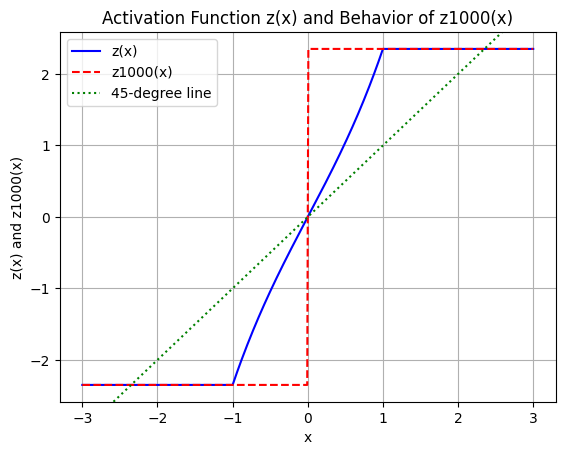

In [28]:
import matplotlib.pyplot as plt
def z(x):
    if x > 1:
        out = np.exp(1) - np.exp(-1)
    elif x < -1:
        out = np.exp(-1) - np.exp(1)
    else:
        out = np.exp(x) - np.exp(-x)
    return out

# Function to compute z1000(x) by repeated composition of z(x)
def z1000(x, num_iterations=1000):
    for _ in range(num_iterations):
        x = z(x)  # Apply the function z repeatedly
    return x

# Generate x values for plotting
x_values = np.linspace(-3, 3, 400)
z_values = np.array([z(x) for x in x_values])
z1000_values = np.array([z1000(x) for x in x_values])

# Plot the activation function z(x) and z1000(x)
plt.figure()
plt.plot(x_values, z_values, label='z(x)', color='blue')
plt.plot(x_values, z1000_values, label='z1000(x)', color='red', linestyle='--')
plt.axline((0, 0), slope=1, color='green', linestyle=':', label='45-degree line')

# Add labels and legend
plt.title('Activation Function z(x) and Behavior of z1000(x)')
plt.xlabel('x')
plt.ylabel('z(x) and z1000(x)')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()